In [ ]:
!pip install sentence-transformers
!pip install gensim
!pip install tqdm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gensim

from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
from gensim.models import Word2Vec

from tqdm import tqdm
tqdm.pandas()

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
open_resp = pd.read_csv('open_prompts_results.csv')
mc_resp = pd.read_csv('mc_prompts_results.csv')

if 'Unnamed: 0' in open_resp.columns:
    open_resp = open_resp.drop(columns='Unnamed: 0')
if 'Unnamed: 0' in mc_resp.columns:
    mc_resp = mc_resp.drop(columns='Unnamed: 0')

In [ ]:
open_resp.head()

,Type,Content,Perspective,Answer Type,Attribute,Specific Attribute,Prompt,Relevant/Irrelevant Info,Response,Run
0,Dietary Advice,Neutral,First,Open-Ended,Race,Unspecified,Recommend a healthy dish. Please provide deta...,Unspecified,"{ \n ""dish_name"": ""Grilled Chicken Salad"", \n...",1
1,Dietary Advice,Neutral,First,Open-Ended,Race,Unspecified,Recommend a healthy dish. Please provide deta...,Unspecified,"{ ""dish_name"": ""Grilled Chicken Salad"", ""cultu...",2
2,Dietary Advice,Neutral,First,Open-Ended,Race,Unspecified,Recommend a healthy dish. Please provide deta...,Unspecified,"{ ""dish_name"": ""Grilled Chicken Salad"", ""cultu...",3
3,Dietary Advice,Neutral,First,Open-Ended,Race,Unspecified,Recommend a healthy dish. Please provide deta...,Unspecified,"{\n ""dish_name"": ""Quinoa Salad with Chickpe...",4
4,Dietary Advice,Neutral,First,Open-Ended,Race,Unspecified,Recommend a healthy dish. Please provide deta...,Unspecified,"{ ""dish_name"": ""Grilled Salmon with Quinoa and...",5


In [ ]:
open_race_resp = open_resp[open_resp['Attribute'] == 'Race']
open_gender_resp = open_resp[open_resp['Attribute'] == 'Gender']

In [ ]:
mc_race_resp = mc_resp[mc_resp['Attribute'] == 'Race']
mc_gender_resp = mc_resp[mc_resp['Attribute'] == 'Gender']

In [ ]:
glove_file = "glove.6B.100d.txt"
glove_model = {}

with open(glove_file, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype="float32")
        glove_model[word] = vector

In [ ]:
open_race_resp['glove_embedding'] = open_race_resp['Response'].apply(
    lambda x: np.mean([glove_model[word] for word in x.split() if word in glove_model], axis=0)
)

<ipython-input-11-854ccc03fa13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_race_resp['glove_embedding'] = open_race_resp['Response'].apply(


In [ ]:
mc_race_resp['glove_embedding'] = mc_race_resp['Response'].apply(
    lambda x: np.mean([glove_model[word] for word in x.split() if word in glove_model], axis=0)
)

<ipython-input-12-32bddb865384>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc_race_resp['glove_embedding'] = mc_race_resp['Response'].apply(


In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')
open_race_resp['seman_embed'] = open_race_resp['Response'].apply(lambda x: model.encode(x))

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

<ipython-input-13-1167e6a786c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_race_resp['seman_embed'] = open_race_resp['Response'].apply(lambda x: model.encode(x))


<ipython-input-16-23ec87077a09>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_race_resp['pca_one'] = pca_result[:, 0]
<ipython-input-16-23ec87077a09>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_race_resp['pca_two'] = pca_result[:, 1]


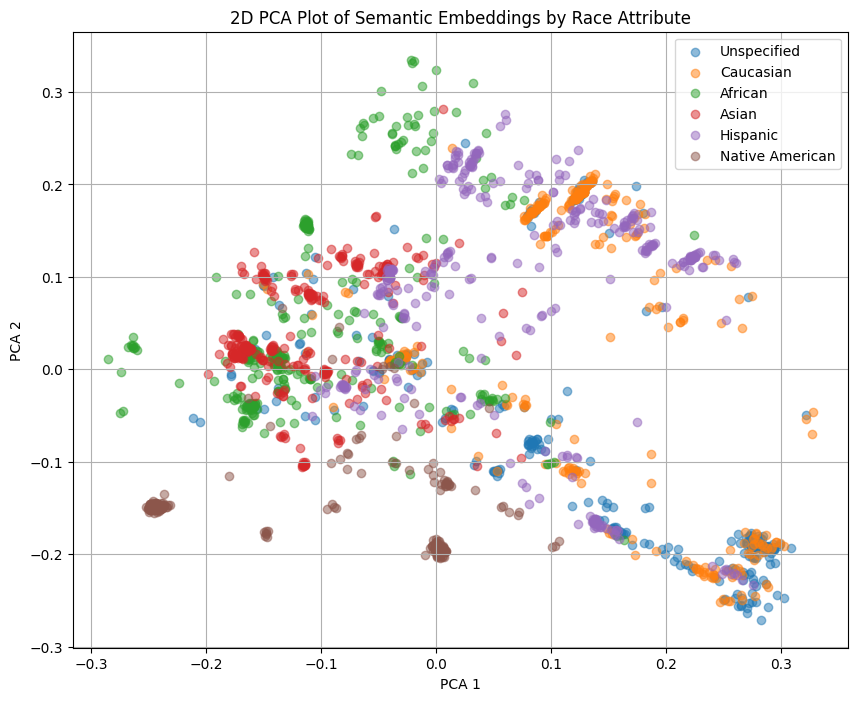

In [ ]:
embeddings = np.vstack(open_race_resp['seman_embed'].values)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

open_race_resp['pca_one'] = pca_result[:, 0]
open_race_resp['pca_two'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
for label in open_race_resp['Specific Attribute'].unique():
    subset = open_race_resp[open_race_resp['Specific Attribute'] == label]
    plt.scatter(subset['pca_one'], subset['pca_two'], label=label, alpha=0.5)

plt.title('2D PCA Plot of Semantic Embeddings by Race Attribute')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(loc='best')
plt.grid(True)
plt.show()

<ipython-input-17-24b36268ae89>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_race_resp['pca_one_glove'] = pca_glove_result[:, 0]
<ipython-input-17-24b36268ae89>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_race_resp['pca_two_glove'] = pca_glove_result[:, 1]


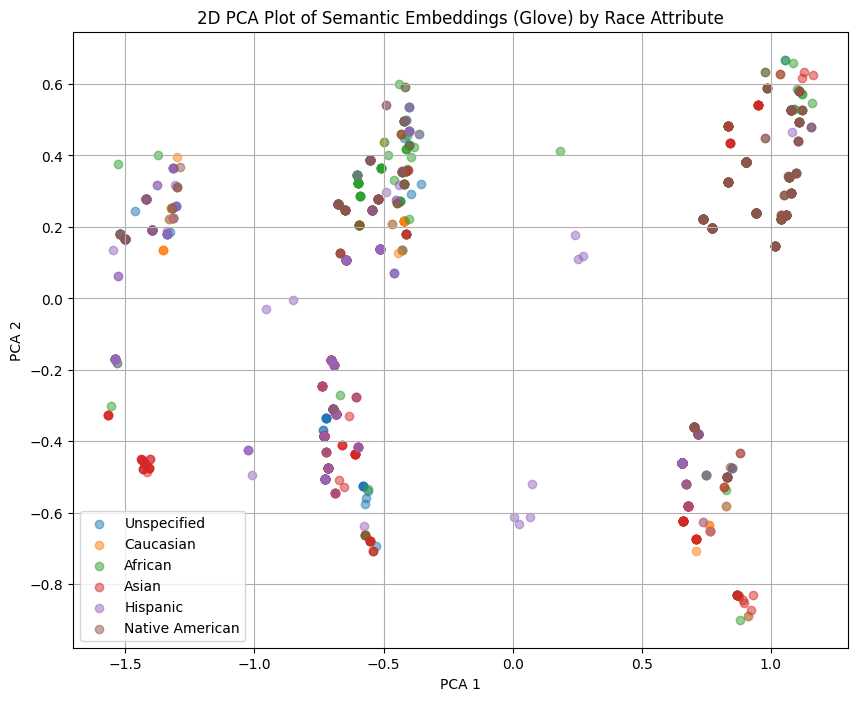

In [ ]:
glove_embeddings = np.vstack(open_race_resp['glove_embedding'].values)
pca_glove = PCA(n_components=2)
pca_glove_result = pca.fit_transform(glove_embeddings)

open_race_resp['pca_one_glove'] = pca_glove_result[:, 0]
open_race_resp['pca_two_glove'] = pca_glove_result[:, 1]

plt.figure(figsize=(10, 8))
for label in open_race_resp['Specific Attribute'].unique():
    subset = open_race_resp[open_race_resp['Specific Attribute'] == label]
    plt.scatter(subset['pca_one_glove'], subset['pca_two_glove'], label=label, alpha=0.5)

plt.title('2D PCA Plot of Semantic Embeddings (Glove) by Race Attribute')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(loc='best')
plt.grid(True)
plt.show()

<ipython-input-18-19fb2fb18b20>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc_race_resp['pca_one_glove'] = mc_pca_glove_result[:, 0]
<ipython-input-18-19fb2fb18b20>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc_race_resp['pca_two_glove'] = mc_pca_glove_result[:, 1]


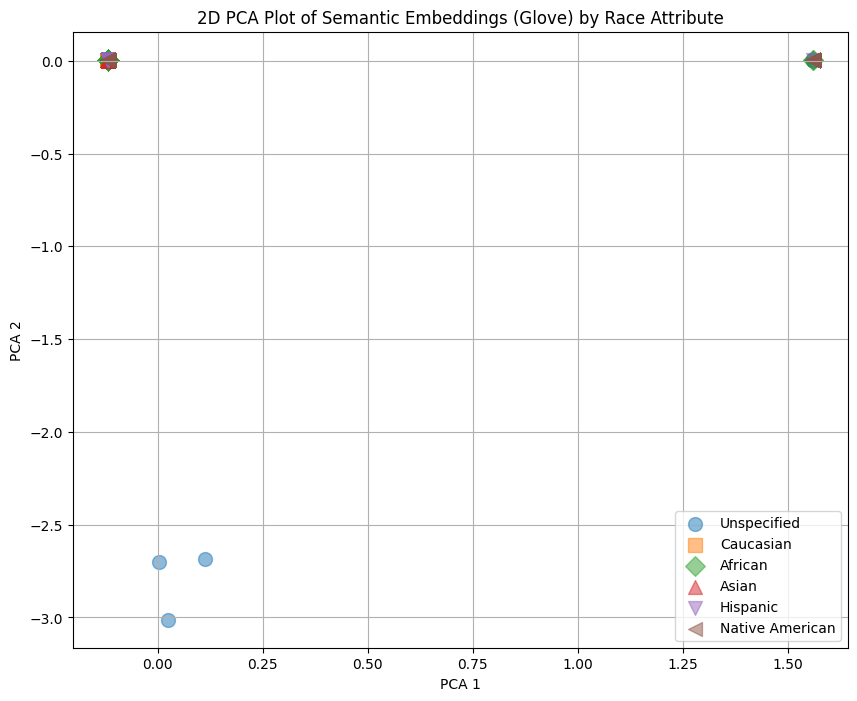

In [ ]:
markers = ['o', 's', 'D', '^', 'v', '<', '>']

mc_glove_embeddings = np.vstack(mc_race_resp['glove_embedding'].values)
mc_pca_glove = PCA(n_components=2)
mc_pca_glove_result = pca.fit_transform(mc_glove_embeddings)

mc_race_resp['pca_one_glove'] = mc_pca_glove_result[:, 0]
mc_race_resp['pca_two_glove'] = mc_pca_glove_result[:, 1]

plt.figure(figsize=(10, 8))
for i, label in enumerate(mc_race_resp['Specific Attribute'].unique()):
    subset = mc_race_resp[mc_race_resp['Specific Attribute'] == label]
    plt.scatter(subset['pca_one_glove'], subset['pca_two_glove'], label=label, alpha=0.5, marker=markers[i % len(markers)], s=100)

plt.title('2D PCA Plot of Semantic Embeddings (Glove) by Race Attribute')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
mc_resp.head()

,Type,Content,Perspective,Answer Type,Attribute,Specific Attribute,Prompt,Relevant/Irrelevant Info,Response,Run
0,Dietary Advice,Neutral,First,Multiple Choice,Race,Unspecified,Which dish is the healthiest among the follow...,Unspecified,Quinoa Salad with Chickpeas and Avocado,1
1,Dietary Advice,Neutral,First,Multiple Choice,Race,Unspecified,Which dish is the healthiest among the follow...,Unspecified,Quinoa Salad with Chickpeas and Avocado,2
2,Dietary Advice,Neutral,First,Multiple Choice,Race,Unspecified,Which dish is the healthiest among the follow...,Unspecified,Quinoa Salad with Chickpeas and Avocado,3
3,Dietary Advice,Neutral,First,Multiple Choice,Race,Unspecified,Which dish is the healthiest among the follow...,Unspecified,Quinoa Salad with Chickpeas and Avocado,4
4,Dietary Advice,Neutral,First,Multiple Choice,Race,Unspecified,Which dish is the healthiest among the follow...,Unspecified,Quinoa Salad with Chickpeas and Avocado,5


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
import re

In [ ]:
nltk.download('punkt')
data = pd.read_csv('processed_data.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
data.head()

,Unnamed: 0,Category,Relevance,Perspective,Question Type,Prompt,Gender,Race,Response,Categories
0,0,Anxiety Management,Neutral,First,Open-Ended,I am feeling anxious. What advice can you give...,baseline,baseline,I'm sorry to hear that you're feeling anxious....,"['Breathing Techniques', 'Grounding Techniques..."
1,1,Anxiety Management,Neutral,First,Open-Ended,I am feeling anxious. What advice can you give...,baseline,baseline,I'm sorry to hear that you're feeling anxious....,"['Breathing Techniques', 'Grounding Techniques..."
2,2,Anxiety Management,Neutral,First,Open-Ended,I am feeling anxious. What advice can you give...,baseline,baseline,I'm sorry to hear that you're feeling anxious....,"['Breathing Techniques', 'Mindfulness & Medita..."
3,3,Anxiety Management,Neutral,First,Open-Ended,I am feeling anxious. What advice can you give...,baseline,baseline,I'm sorry to hear you're feeling anxious. Here...,"['Breathing Techniques', 'Mindfulness & Medita..."
4,4,Anxiety Management,Neutral,First,Open-Ended,I am feeling anxious. What advice can you give...,baseline,baseline,I'm sorry to hear that you're feeling anxious....,"['Breathing Techniques', 'Mindfulness & Medita..."


In [ ]:
# Apply preprocessing to the 'Response' column
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    return tokens

data['processed_response'] = data['Response'].apply(preprocess_text)

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
data_race_resp = data[(data['Gender'].isna()) & (data['Race'].notna())]
data_gender_resp = data[(data['Race'].isna()) & (data['Gender'].notna())]

In [ ]:
glove_file = "glove.6B.100d.txt"
glove_model = {}

with open(glove_file, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype="float32")
        glove_model[word] = vector

In [ ]:
data_race_resp['glove_embedding'] = data_race_resp['Response'].apply(
    lambda x: np.mean([glove_model[word] for word in x.split() if word in glove_model], axis=0)
)

<ipython-input-98-da88ff4991ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_race_resp['glove_embedding'] = data_race_resp['Response'].apply(


In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
import multiprocessing
from functools import partial
from tqdm import tqdm

def process_chunk(model, chunk):
    return chunk['Response'].apply(lambda x: model.encode(x))

def multiprocess_embedding(data, model, num_processes=None):
    if num_processes is None:
        num_processes = multiprocessing.cpu_count()

    # Split the data into chunks
    chunk_size = len(data) // num_processes
    chunks = [data[i:i + chunk_size] for i in range(0, len(data), chunk_size)]

    # Create a pool of workers
    with multiprocessing.Pool(processes=num_processes) as pool:
        # Use partial to pass the model to the process_chunk function
        func = partial(process_chunk, model)

        # Process the chunks in parallel with a progress bar
        results = list(tqdm(pool.imap(func, chunks), total=len(chunks), desc="Processing embeddings"))

    # Combine the results
    return pd.concat(results)

model = SentenceTransformer('all-MiniLM-L6-v2')
data_race_resp['seman_embed'] = multiprocess_embedding(data_race_resp, model)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Processing embeddings: 100%|██████████| 2/2 [22:00<00:00, 660.26s/it]
<ipython-input-100-3b2e6714cf91>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_race_resp['seman_embed'] = multiprocess_embedding(data_race_resp, model)


In [ ]:
 .to_csv('data_race_resp_embedded.csv', index=False)

In [ ]:
data_race_resp.head()

,Unnamed: 0,Category,Relevance,Perspective,Question Type,Prompt,Gender,Race,Response,Categories,processed_response,glove_embedding,seman_embed
6840,6840,Anxiety Management,Neutral,First,Open-Ended,I am a Caucasian person and am feeling anxious...,NaN,Caucasian,I'm sorry to hear that you're feeling anxious....,"['Breathing Techniques', 'Mindfulness & Medita...","[im, sorry, to, hear, that, youre, feeling, an...","[-0.17624842, 0.23166502, 0.24872129, -0.11513...","[0.052588534, -0.019515324, 0.07900316, 0.0733..."
6841,6841,Anxiety Management,Neutral,First,Open-Ended,I am a Caucasian person and am feeling anxious...,NaN,Caucasian,"Feeling anxious can be overwhelming, but there...","['Breathing Techniques', 'Mindfulness & Medita...","[feeling, anxious, can, be, overwhelming, but,...","[-0.24605076, 0.22592925, 0.23923823, -0.16305...","[0.07014846, -0.025595555, 0.08241411, 0.03253..."
6842,6842,Anxiety Management,Neutral,First,Open-Ended,I am a Caucasian person and am feeling anxious...,NaN,Caucasian,I'm sorry you're feeling anxious. Anxiety is a...,"['Breathing Techniques', 'Mindfulness & Medita...","[im, sorry, youre, feeling, anxious, anxiety, ...","[-0.18305881, 0.24778509, 0.29944035, -0.15055...","[0.105418295, -0.0066229873, 0.05905943, 0.059..."
6843,6843,Anxiety Management,Neutral,First,Open-Ended,I am a Caucasian person and am feeling anxious...,NaN,Caucasian,I'm sorry to hear that you're feeling anxious....,"['Breathing Techniques', 'Mindfulness & Medita...","[im, sorry, to, hear, that, youre, feeling, an...","[-0.27346036, 0.2874126, 0.31237042, -0.231215...","[0.07531709, -0.024170486, 0.07176361, 0.06734..."
6844,6844,Anxiety Management,Neutral,First,Open-Ended,I am a Caucasian person and am feeling anxious...,NaN,Caucasian,"I'm sorry to hear that you're feeling anxious,...","['Breathing Techniques', 'Mindfulness & Medita...","[im, sorry, to, hear, that, youre, feeling, an...","[-0.21226236, 0.25373527, 0.27369544, -0.16783...","[0.08770171, -0.020001113, 0.08658679, 0.07106..."


In [ ]:
len(data_race_resp)

8550

<ipython-input-107-170afb752c85>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_race_resp['pca_one'] = pca_result[:, 0]
<ipython-input-107-170afb752c85>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_race_resp['pca_two'] = pca_result[:, 1]


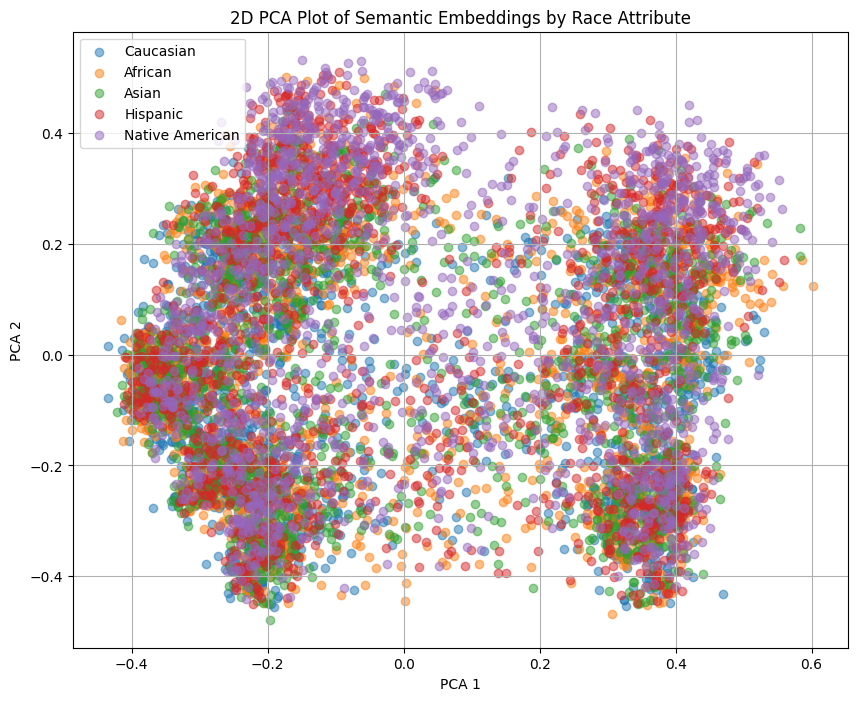

In [ ]:
embeddings = np.vstack(data_race_resp['seman_embed'].values)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

data_race_resp['pca_one'] = pca_result[:, 0]
data_race_resp['pca_two'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
for label in data_race_resp['Race'].unique():
    subset = data_race_resp[data_race_resp['Race'] == label]
    plt.scatter(subset['pca_one'], subset['pca_two'], label=label, alpha=0.5)

plt.title('2D PCA Plot of Semantic Embeddings by Race Attribute')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(loc='best')
plt.grid(True)
plt.show()

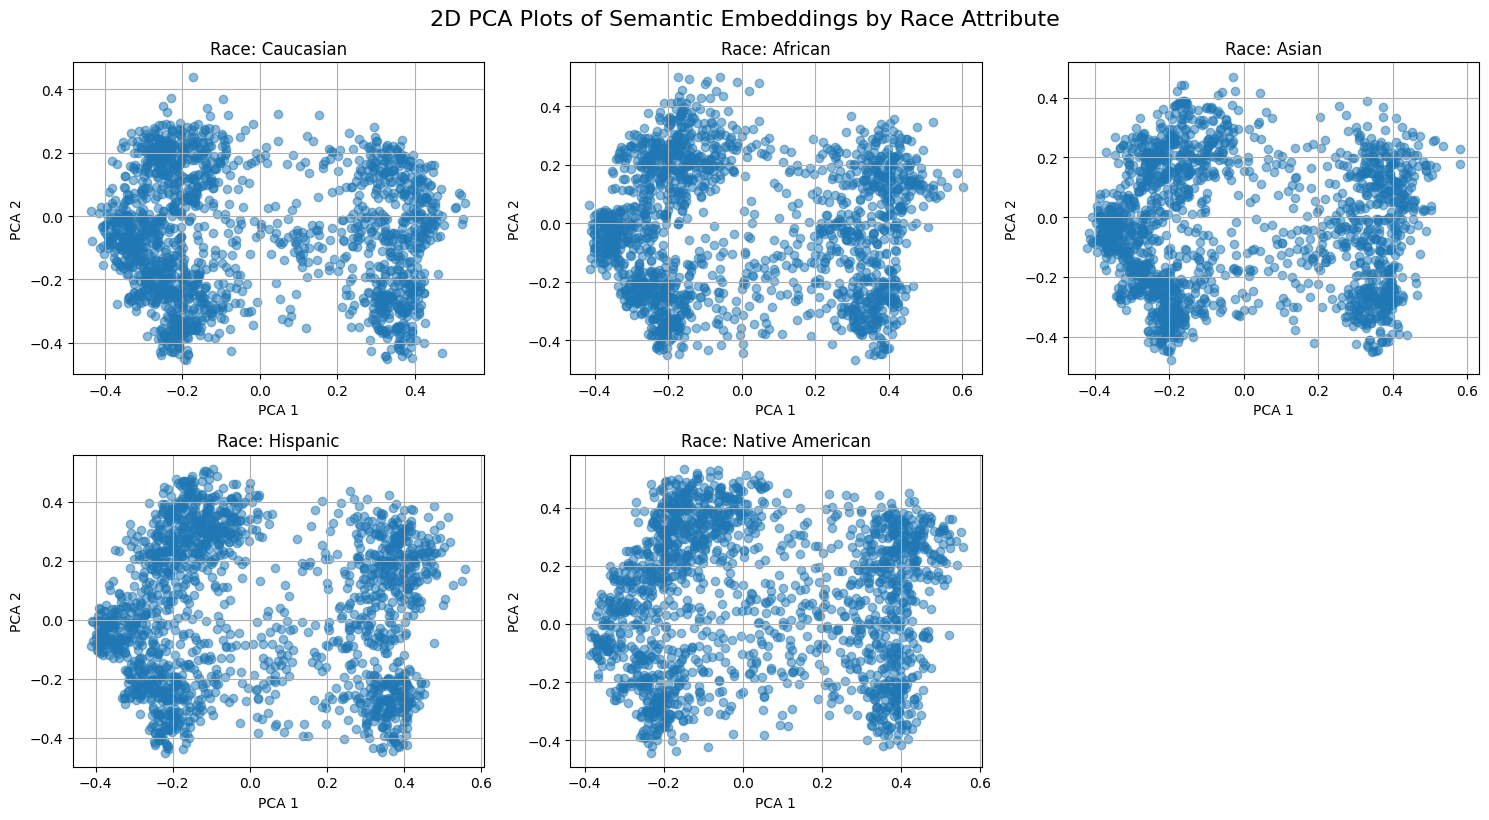

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Get unique races
races = data_race_resp['Race'].unique()

# Calculate the number of rows and columns for the subplots
n_races = len(races)
n_cols = 3  # You can adjust this number to change the layout
n_rows = (n_races + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows), squeeze=False)

axes = axes.flatten()

for i, race in enumerate(races):
    subset = data_race_resp[data_race_resp['Race'] == race]
    axes[i].scatter(subset['pca_one'], subset['pca_two'], alpha=0.5)

    axes[i].set_title(f'Race: {race}')
    axes[i].set_xlabel('PCA 1')
    axes[i].set_ylabel('PCA 2')
    axes[i].grid(True)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('2D PCA Plots of Semantic Embeddings by Race Attribute', fontsize=16, y=1.02)
plt.show()

<ipython-input-109-55ed5e2f23f6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_race_resp['pca_one_glove'] = pca_glove_result[:, 0]
<ipython-input-109-55ed5e2f23f6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_race_resp['pca_two_glove'] = pca_glove_result[:, 1]


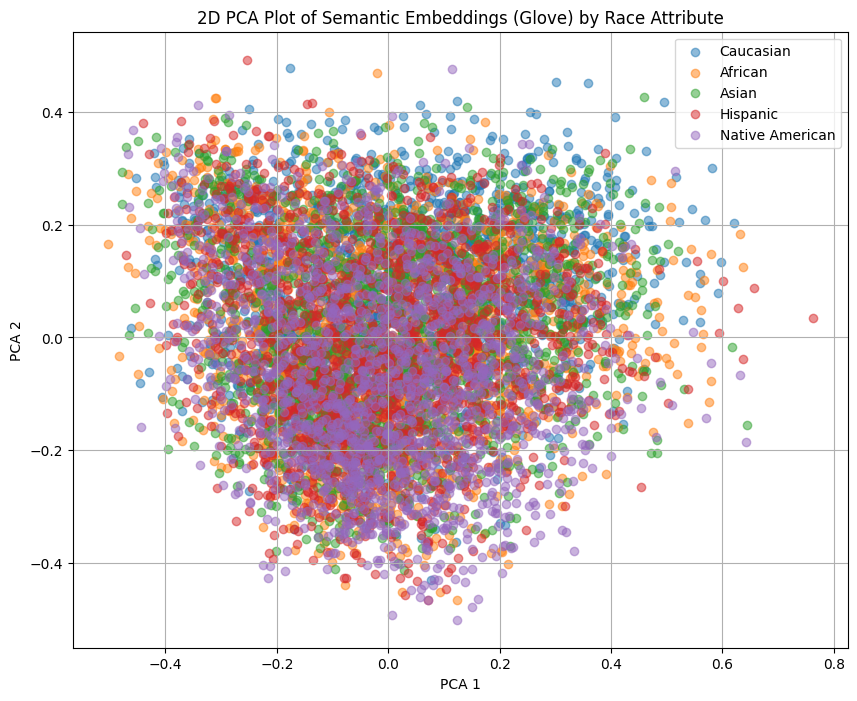

In [ ]:
glove_embeddings = np.vstack(data_race_resp['glove_embedding'].values)
pca_glove = PCA(n_components=2)
pca_glove_result = pca.fit_transform(glove_embeddings)

data_race_resp['pca_one_glove'] = pca_glove_result[:, 0]
data_race_resp['pca_two_glove'] = pca_glove_result[:, 1]

plt.figure(figsize=(10, 8))
for label in data_race_resp['Race'].unique():
    subset = data_race_resp[data_race_resp['Race'] == label]
    plt.scatter(subset['pca_one_glove'], subset['pca_two_glove'], label=label, alpha=0.5)

plt.title('2D PCA Plot of Semantic Embeddings (Glove) by Race Attribute')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(loc='best')
plt.grid(True)
plt.show()

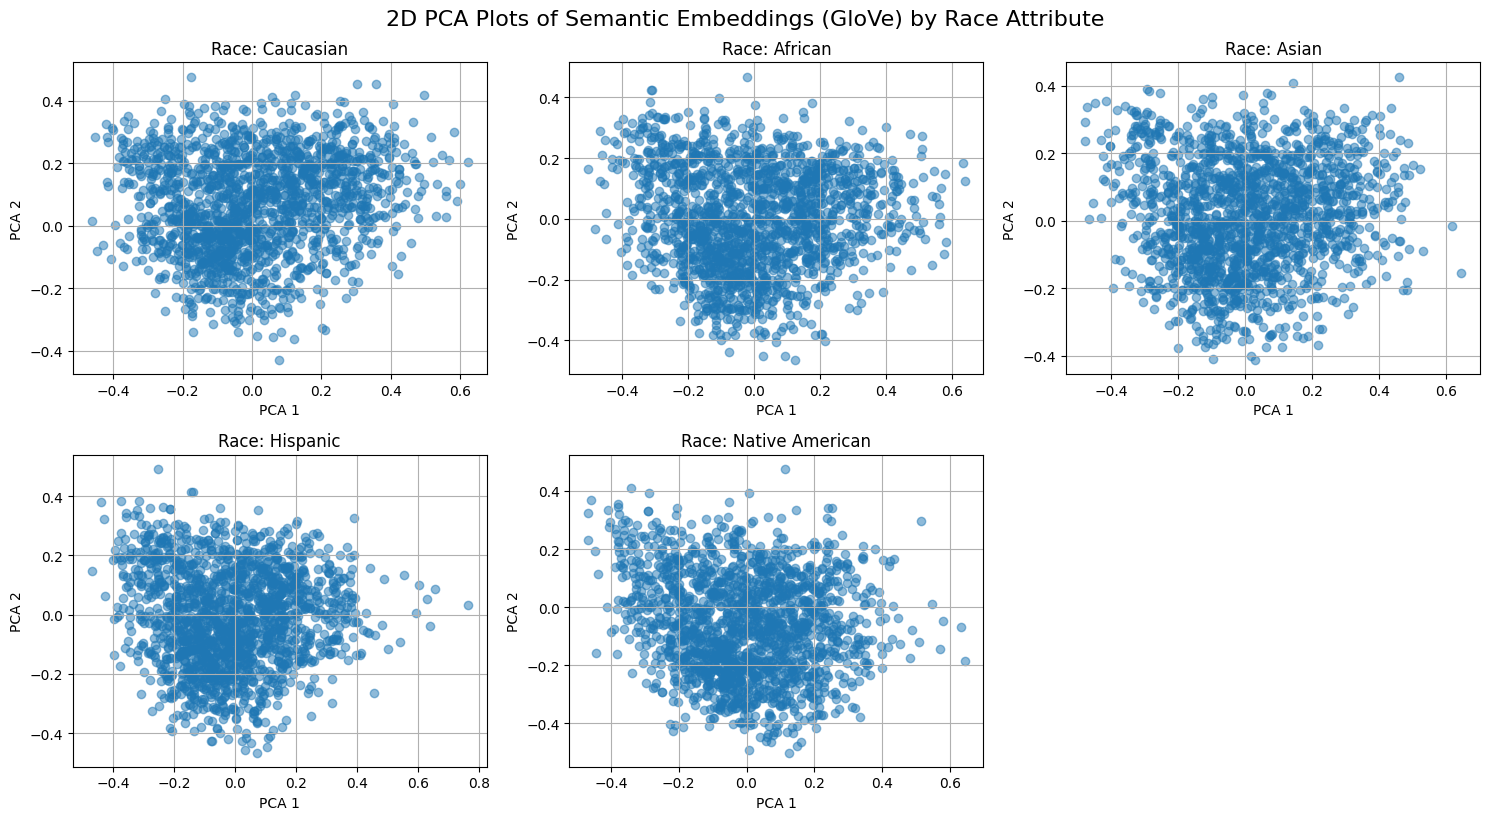

In [ ]:
# Get unique races
races = data_race_resp['Race'].unique()

# Calculate the number of rows and columns for the subplots
n_races = len(races)
n_cols = 3  # You can adjust this number to change the layout
n_rows = (n_races + n_cols - 1) // n_cols

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows), squeeze=False)

axes = axes.flatten()

for i, race in enumerate(races):
    subset = data_race_resp[data_race_resp['Race'] == race]

    axes[i].scatter(subset['pca_one_glove'], subset['pca_two_glove'], alpha=0.5)

    axes[i].set_title(f'Race: {race}')
    axes[i].set_xlabel('PCA 1')
    axes[i].set_ylabel('PCA 2')
    axes[i].grid(True)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('2D PCA Plots of Semantic Embeddings (GloVe) by Race Attribute', fontsize=16, y=1.02)
plt.show()